In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [10]:
data = pd.read_csv(r"C:\Users\USER\Downloads\Hotel book.csv")

**DISPLAYING THE FIRST FEW ROWS OF THE DATASET**

In [11]:
data.head()

,Date,Month,Weekday,Season,Holiday,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,target
0,1/1/2024,1,1,Winter,1,50000,80000,45000,0.75,120,...,75,4.5,0.75,45000,50000,10000,5000,65000,15000,1
1,2/1/2024,1,2,Winter,0,60000,85000,48000,0.78,125,...,78,4.6,0.78,48000,55000,12000,6000,73000,12000,0
2,3/1/2024,1,3,Winter,0,70000,90000,49000,0.80,130,...,80,4.7,0.80,49000,58000,11000,7000,76000,14000,0
3,4/1/2024,1,4,Winter,1,50000,80000,45000,0.75,120,...,75,4.5,0.75,45000,50000,10000,5000,65000,15000,1
4,5/1/2024,1,5,Winter,0,60000,85000,48000,0.78,125,...,78,4.6,0.78,48000,55000,12000,6000,73000,12000,1


**GETTING THE SIZE OF THE DATAFRAME**

In [12]:
data.size

4142

**HERE, AM GETTING SUMMARY STATISTICS OF THE DATAFRAME**

In [13]:
data.describe()

,Month,Weekday,Holiday,Marketing_Spend,Revenue,Room_Revenue,Occupancy_Rate,ADR,RevPAR,Available_Rooms,...,Occupancy_Managed_Guests,RevPAR_All,Occupancy_All,Room_Revenue_All,Total_Revenue,Operating_Expenses,Fixed_Costs,Variable_Costs,Total_Costs,target
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,...,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,3.266055,3.908257,0.119266,59954.128440,84917.431193,47009.174312,0.774862,124.743119,95.289083,31.376147,...,77.486239,4.565138,0.774862,47009.174312,53458.715596,10963.302752,5660.550459,69454.128440,15463.302752,0.504587
std,2.406173,2.030058,0.325598,8093.647853,4501.292901,2057.035861,0.023516,5.191524,7.906691,1.451621,...,2.351574,0.111701,0.023516,2057.035861,3187.162067,744.443684,917.627612,5510.319143,2781.142203,0.502288
min,1.000000,1.000000,0.000000,50000.000000,78000.000000,43000.000000,0.730000,115.000000,79.150000,28.000000,...,73.000000,4.300000,0.730000,43000.000000,48000.000000,10000.000000,4000.000000,58000.000000,12000.000000,0.000000
25%,1.000000,2.000000,0.000000,50000.000000,80000.000000,45000.000000,0.750000,120.000000,90.000000,30.000000,...,75.000000,4.500000,0.750000,45000.000000,50000.000000,10000.000000,5000.000000,65000.000000,14000.000000,0.000000
50%,2.000000,4.000000,0.000000,60000.000000,85000.000000,48000.000000,0.780000,125.000000,96.000000,32.000000,...,78.000000,4.600000,0.780000,48000.000000,55000.000000,11000.000000,6000.000000,71000.000000,15000.000000,1.000000
75%,7.000000,6.000000,0.000000,70000.000000,90000.000000,49000.000000,0.800000,130.000000,101.120000,33.000000,...,80.000000,4.700000,0.800000,49000.000000,55000.000000,11500.000000,6000.000000,73000.000000,15500.000000,1.000000
max,7.000000,7.000000,1.000000,70000.000000,93000.000000,50000.000000,0.810000,135.000000,108.540000,33.000000,...,81.000000,4.700000,0.810000,50000.000000,58000.000000,12000.000000,7000.000000,76000.000000,21500.000000,1.000000


**HERE, I AM TRYING TO ACCESS THE 'TARGET' COLUMN FROM THE DATAFRAME, WHICH CONTAINS THE OUTCOMES I WANT TO PREDICT.**

In [14]:
data.target

0      1
1      0
2      0
3      1
4      1
      ..
104    1
105    0
106    1
107    0
108    1
Name: target, Length: 109, dtype: int64

**HERE, I AM SELECTING NUMERIC COLUMNS FROM THE DATAFRAME AND CALCULATING THE CORRELATION MATRIX.**

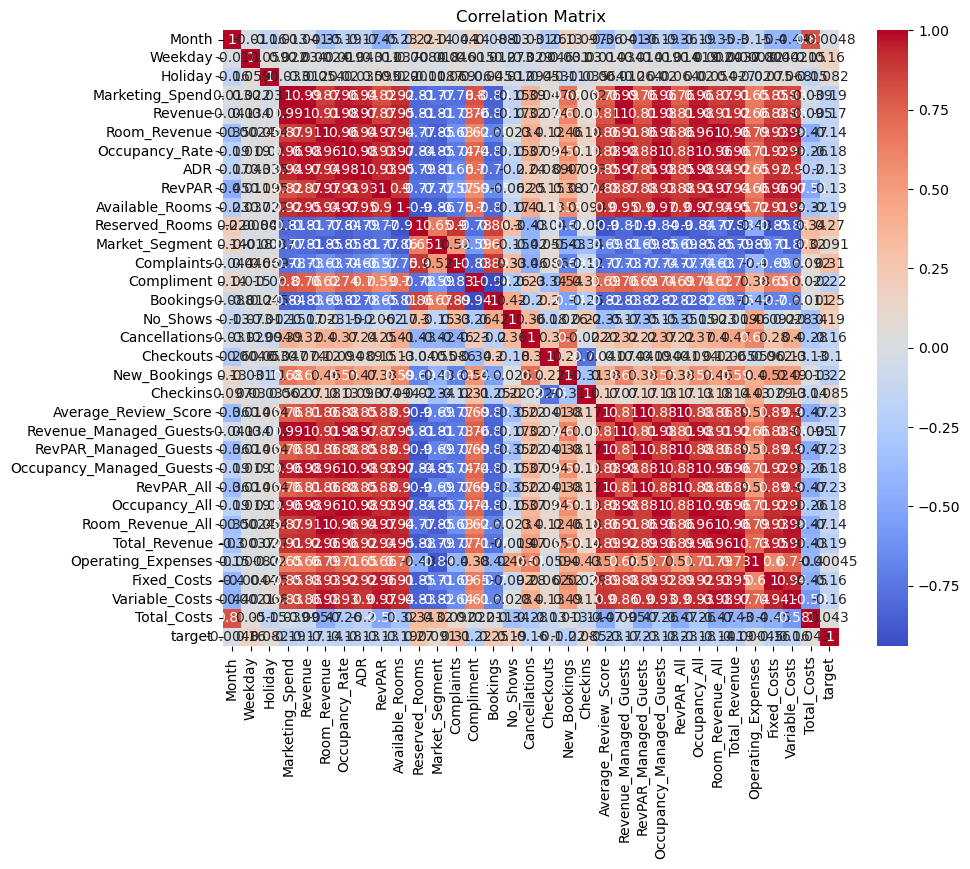

In [15]:
data_num = data.select_dtypes(include=['int64','float64'])
correlation_matrix = data_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

**PREPARING THE DATA FOR MODEL TRAINING :
HERE, I AM DROPPING UNNECESSARY COLUMNS AND SEPARATING THE FEATURES FROM THE TARGET VARIABLE.**

In [16]:
features = data.drop(columns=['Date', 'target'])
target = data['target']
features = pd.get_dummies(features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)

Training set shape: (87, 41)
Testing set shape: (22, 41)


**TRAINING A SUPPORT VECTOR MACHINE MODEL :
HERE, I AM PREPARING THE DATA BY DROPPING UNNECESSARY COLUMNS AND ENCODING CATEGORICAL VARIABLES.**

In [17]:
features = data.drop(columns=['Date', 'target'])
target = data['target']
features = pd.get_dummies(features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_scaled, y_train)
model_details = f"SVC(kernel='{svm_model.kernel}', probability={svm_model.probability})"
print(model_details)

SVC(kernel='linear', probability=True)


**TRAINING AND EVALUATING THE SVM MODEL :
HERE, I AM PREPARING THE DATA BY DROPPING UNNECESSARY COLUMNS AND ENCODING CATEGORICAL VARIABLES.**

In [18]:
features = data.drop(columns=['Date', 'target'])
target = data['target']
features = pd.get_dummies(features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['1']['precision']
recall = report['1']['recall']
f1_score = report['1']['f1-score']
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.5
Precision: 0.7142857142857143
Recall: 0.35714285714285715
F1 Score: 0.47619047619047616


**EVALUATING THE SVM MODEL WITH A CONFUSION MATRIX :
PREPARING THE DATA BY DROPPING UNNECESSARY COLUMNS AND ENCODING CATEGORICAL VARIABLES.**

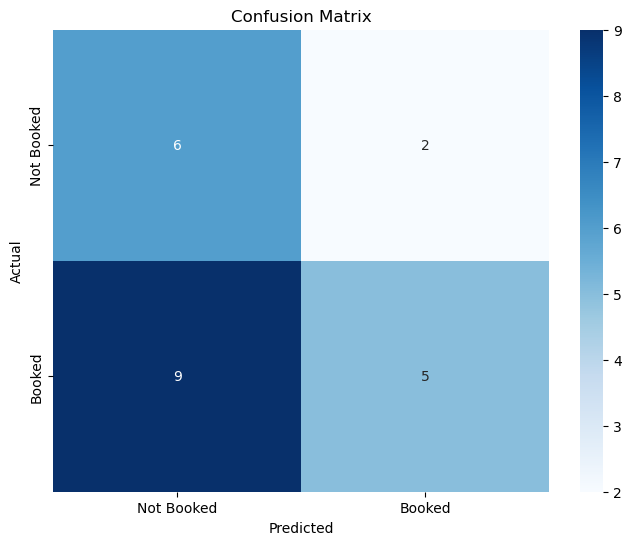

In [54]:
features = data.drop(columns=['Date', 'target'])
target = data['target']
features = pd.get_dummies(features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Booked', 'Booked'], 
            yticklabels=['Not Booked', 'Booked'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**PREDICTING OUTCOMES WITH THE SVM MODEL :
I LOADED THE DATA AND PREPARING IT BY DROPPING UNNECESSARY COLUMNS AND ENCODING CATEGORICAL VARIABLES.**

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
data = pd.read_csv('Hotel book.csv')
features = data.drop(columns=['Date', 'target'])
target = data['target']
features = pd.get_dummies(features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
predictions = svm_model.predict(X_test_scaled)
predicted_df = pd.DataFrame(X_test, columns=features.columns)
predicted_df['Predicted'] = predictions
print(predicted_df[['Predicted']])

     Predicted
78           0
10           1
4            1
84           1
64           0
68           0
30           0
45           0
96           1
11           0
79           0
80           0
0            0
81           1
18           1
70           0
56           0
72           0
107          0
42           0
12           1
36           0


**LOADING THE DATA AND PREPARING IT BY DROPPING UNNECESSARY COLUMNS AND ENCODING CATEGORICAL VARIABLES.**

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
data = pd.read_csv('Hotel book.csv')
features = data.drop(columns=['Date', 'target'])
features = pd.get_dummies(features, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
target = data['target']
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_scaled, target)
new_data = pd.DataFrame({
    'Month': [1],
    'Weekday': [1],
    'Season_Winter': [1],
    'Holiday': [1],
    'Marketing_Spend': [50000],
    'Revenue': [80000],
    'Room_Revenue': [45000],
    'Occupancy_Rate': [0.75],
    'ADR': [120],
    'RevPAR': [90],
    'Available_Rooms': [30],
    'Reserved_Rooms': [10],
    'Booking_Channel_Direct': [1],
    'Guest_Type_Leisure': [1],
    'Market_Segment': [0.25],
    'Guest_Country_USA': [1],
    'Complaints': [2],
    'Compliment': [0],
    'Bookings': [10],
    'No_Shows': [1],
    'Cancellations': [0],
    'Checkouts': [8],
    'New_Bookings': [2],
    'Checkins': [1],
    'Average_Review_Score': [4.5],
    'Revenue_Managed_Guests': [800],
    'RevPAR_Managed_Guests': [4.5],
    'Occupancy_Managed_Guests': [75],
    'RevPAR_All': [4.5],
    'Occupancy_All': [0.75],
    'Room_Revenue_All': [45000],
    'Total_Revenue': [50000],
    'Operating_Expenses': [10000],
    'Fixed_Costs': [5000],
    'Variable_Costs': [65000],
    'Total_Costs': [15000]
})

new_data = pd.get_dummies(new_data, drop_first=True)
new_data = new_data.reindex(columns=features.columns, fill_value=0)
new_data_scaled = scaler.transform(new_data)
predictions = svm_model.predict(new_data_scaled)
print(predictions)

[1]
